In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
import numpy as np 

In [2]:

df = pd.read_csv('cars.csv')
df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0
...,...,...,...,...,...,...,...,...,...
4168,Renault,sedan,430,2.0,Gas,yes,1988,25,999.0
4169,Renault,van,200,1.9,Diesel,no,1997,Scenic,800.0
4170,Mitsubishi,sedan,340,NaN,Other,yes,1986,Galant,800.0
4171,Toyota,sedan,10,1.5,Petrol,yes,1979,Corolla,600.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Body          4173 non-null   object 
 2   Mileage       4173 non-null   int64  
 3   EngineV       4025 non-null   float64
 4   Engine Type   4173 non-null   object 
 5   Registration  4173 non-null   object 
 6   Year          4173 non-null   int64  
 7   Model         4173 non-null   object 
 8   Price         4173 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 293.5+ KB


In [4]:
df.nunique()

Brand             7
Body              6
Mileage         410
EngineV          72
Engine Type       4
Registration      2
Year             39
Model           306
Price           902
dtype: int64

In [5]:
from sklearn import preprocessing 
le_brand = preprocessing.LabelEncoder()
le_brand.fit(df['Brand'].unique())

le_body = preprocessing.LabelEncoder()
le_body.fit(df['Body'].unique())

le_model = preprocessing.LabelEncoder()
le_model.fit(df['Model'].unique())

le_engtype = preprocessing.LabelEncoder()
le_engtype.fit(df['Engine Type'].unique())

le_register = preprocessing.LabelEncoder()
le_register.fit(df['Registration'].unique())

df['Brand_num'] = le_brand.transform(df['Brand'])
df['Body_num'] = le_body.transform(df['Body'])
df['Model_num'] = le_model.transform(df['Model'])
df['Engine_Type_num'] = le_engtype.transform(df['Engine Type'])
df['Registration_num'] = le_register.transform(df['Registration'])


df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price,Brand_num,Body_num,Model_num,Engine_Type_num,Registration_num
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0,2,3,239,3,1
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0,2,2,127,3,1
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0,2,3,242,3,1
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0,2,3,239,3,1
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0,2,2,240,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,Renault,sedan,430,2.0,Gas,yes,1988,25,999.0,4,3,13,1,1
4169,Renault,van,200,1.9,Diesel,no,1997,Scenic,800.0,4,5,252,0,0
4170,Mitsubishi,sedan,340,NaN,Other,yes,1986,Galant,800.0,3,3,144,2,1
4171,Toyota,sedan,10,1.5,Petrol,yes,1979,Corolla,600.0,5,3,113,3,1


In [6]:
df = df.drop(columns=['Brand', 'Body','Registration','Model', 'Engine Type'])
# df.columns

In [7]:
df

,Mileage,EngineV,Year,Price,Brand_num,Body_num,Model_num,Engine_Type_num,Registration_num
0,68,6.0,2011,300000.0,2,3,239,3,1
1,37,5.0,2012,300000.0,2,2,127,3,1
2,29,6.0,2011,295000.0,2,3,242,3,1
3,29,6.0,2011,295000.0,2,3,239,3,1
4,6,5.5,2016,250000.0,2,2,240,3,1
...,...,...,...,...,...,...,...,...,...
4168,430,2.0,1988,999.0,4,3,13,1,1
4169,200,1.9,1997,800.0,4,5,252,0,0
4170,340,NaN,1986,800.0,3,3,144,2,1
4171,10,1.5,1979,600.0,5,3,113,3,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           4173 non-null   int64  
 1   EngineV           4025 non-null   float64
 2   Year              4173 non-null   int64  
 3   Price             4173 non-null   float64
 4   Brand_num         4173 non-null   int32  
 5   Body_num          4173 non-null   int32  
 6   Model_num         4173 non-null   int32  
 7   Engine_Type_num   4173 non-null   int32  
 8   Registration_num  4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [9]:
df.isnull().sum()

Mileage               0
EngineV             148
Year                  0
Price                 0
Brand_num             0
Body_num              0
Model_num             0
Engine_Type_num       0
Registration_num      0
dtype: int64

In [10]:
df.columns = [col.lower().replace(' ','_') for col in df.columns ]

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mileage           4173 non-null   int64  
 1   enginev           4025 non-null   float64
 2   year              4173 non-null   int64  
 3   price             4173 non-null   float64
 4   brand_num         4173 non-null   int32  
 5   body_num          4173 non-null   int32  
 6   model_num         4173 non-null   int32  
 7   engine_type_num   4173 non-null   int32  
 8   registration_num  4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [12]:
df['enginev'].fillna(value=df['enginev'].mean())

0       6.000000
1       5.000000
2       6.000000
3       6.000000
4       5.500000
          ...   
4168    2.000000
4169    1.900000
4170    2.762127
4171    1.500000
4172    1.600000
Name: enginev, Length: 4173, dtype: float64

<Axes: >

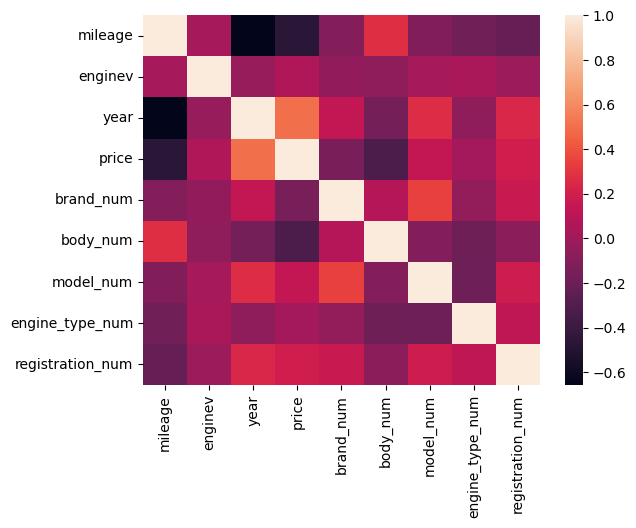

In [13]:
corr  = df.corr(method='pearson')
sns.heatmap(corr)

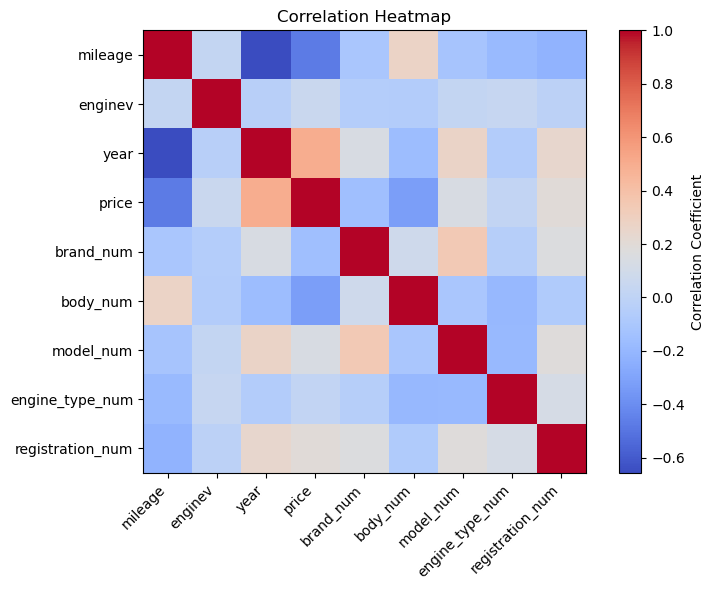

In [14]:
# Create the heatmap using matplotlib
plt.figure(figsize=(8, 6)) # Adjust figure size as needed for better readability

# Using imshow to display the matrix
# 'cmap' sets the color map (e.g., 'viridis', 'coolwarm', 'RdBu', 'YlGnBu')
# 'interpolation' can be 'nearest', 'bilinear', etc. (nearest is good for discrete blocks)
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Add a color bar to show the scale
plt.colorbar(label='Correlation Coefficient')

# Set x and y axis ticks and labels based on the correlation matrix index/columns
# Assuming 'corr' is a pandas DataFrame with meaningful index/columns
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)), corr.index)

# Add a title
plt.title('Correlation Heatmap')

# Ensure layout is tight to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
corr

,mileage,enginev,year,price,brand_num,body_num,model_num,engine_type_num,registration_num
mileage,1.000000,0.025805,-0.657209,-0.470972,-0.103632,0.274665,-0.114445,-0.181472,-0.220995
enginev,0.025805,1.000000,-0.031047,0.055692,-0.052456,-0.055616,0.028657,0.035975,-0.011077
year,-0.657209,-0.031047,1.000000,0.496099,0.137325,-0.161307,0.263233,-0.055630,0.241410
price,-0.470972,0.055692,0.496099,1.000000,-0.147791,-0.320825,0.132988,0.019553,0.196637
brand_num,-0.103632,-0.052456,0.137325,-0.147791,1.000000,0.082238,0.346050,-0.047175,0.161793
body_num,0.274665,-0.055616,-0.161307,-0.320825,0.082238,1.000000,-0.102613,-0.195062,-0.073551
model_num,-0.114445,0.028657,0.263233,0.132988,0.346050,-0.102613,1.000000,-0.190153,0.178531
engine_type_num,-0.181472,0.035975,-0.055630,0.019553,-0.047175,-0.195062,-0.190153,1.000000,0.124755
registration_num,-0.220995,-0.011077,0.241410,0.196637,0.161793,-0.073551,0.178531,0.124755,1.000000


In [16]:
X = df[['year','mileage','brand_num','body_num']]
Y = df[['price']]

In [17]:
from sklearn.model_selection import  train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)#,random_state=50)

In [18]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [19]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [-2562671.01954109]
Coefficients: [[ 1297.4441066    -44.42703349 -2307.26755311 -2714.29254278]]


In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn import metrics 

mae = metrics.mean_absolute_error(y_pred,y_test)
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 11804.5493
Mean Squared Error (MSE): 525884020.3325
Root Mean Squared Error (RMSE): 22932.1613


In [27]:
year= 2016 
mileage = 60 
body = 'sedan'
brand = 'Toyota'

body_num = le_body.transform([body])[0]
brand_num = le_brand.transform([brand])[0]
# Prepare the input for the model.predict() method
# This must be a 2D array (or list of lists) where each inner list is one sample.
# Ensure the order of features matches the order your model was trained on.
# For example, if your model was trained on: ['Year', 'Mileage', 'Brand_num', 'Body_num']
input_features = [[year, mileage, brand_num, body_num]]

# Make the prediction
pred = model.predict(input_features)

print(f"The predicted value is: {pred}") # Assuming a single prediction, format to 2 decimal places

The predicted value is: [[30631.46196574]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
